# Klasificiranje pasem psov glede na skupino v katero spadajo
Pridobitev podatkov smo črpali iz spletne strani: https://dogtime.com/dog-breeds/profiles, Iz nje smo črpali 37 različnih podatkov, od opisa pasem, do url slik in različnih specifikacij, kot so živjenska doba, višina, teža, prilagodljivost, skupina pasme itd. Vse vhodne podatke kar smo uporabili so numerični podatki, za izhodni atribut smo se odločili uporabiti skupine pasem.
Vsi ti atributi zajemajo različne podatke glede psov z katerimi je možno identificirati pasme saj so nekatere pasme bolj usmerjene k športu in zato imajo večjo oceno pri energijski vrednosti, hitrim, učenjem, kot mešani psi ali spremeljevalski psi, ki so bolj osredotočeni, da so družinsko prijateljski in ubogljivi, itd...

Pasme se delijo na 8 različnih skupin: Mešane pasme, Hibridne pasme, spremljevalski psi, športni psi, delovni psi, psi terier, psi goniči, ovčarski psi

Pri zajemanju podatkov smo spremeniti podatke, kot sta višina in teža saj so bili podatki podani v ameriških merilih (inch, pound).

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib import rcParams as rcp
import warnings as warn


df_dog_breeds = pd.read_csv("dog_breeds.csv", index_col='Name', sep=',')
dfDogBreed = df_dog_breeds.sort_index()
dfDogBreed.shape

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


(366, 37)

## Pregled in prikaz podatkov 
V tej točki bomo pregledali podatke in prikazali vizualizacijo podatkov

In [88]:
dfDogBreed.describe()

,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Adaptability,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Wanderlust Potential,Trainability,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Physical Needs,Height,Weight,Life Span
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,316.000000,359.000000,365.000000
mean,3.057377,2.866120,3.713115,2.071038,3.251366,2.978142,3.068306,4.609290,4.062842,3.486339,...,3.191257,3.448087,4.073770,3.300546,3.975410,4.327869,4.040984,37.034968,21.836685,12.414027
std,1.482126,1.168584,0.851875,0.921810,1.164397,0.900267,0.521569,0.621814,0.975810,1.099728,...,1.203433,0.620459,0.874303,0.997174,0.946195,0.766875,0.759209,21.643505,15.549805,1.648032
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.540000,2.040000,4.990000
25%,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,...,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,15.240000,9.070000,11.500000
50%,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,35.560000,20.410000,12.500000
75%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,55.880000,29.480000,13.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,85.090000,81.650000,17.000000


In [89]:
dfDogBreed.isnull().sum()

About                               0
Url_image                           0
Adapts Well To Apartment Living     0
Good For Novice Owners              0
Sensitivity Level                   0
Tolerates Being Alone               0
Tolerates Cold Weather              0
Tolerates Hot Weather               0
Adaptability                        0
Affectionate With Family            0
Kid-Friendly                        0
Dog Friendly                        0
Friendly Toward Strangers           0
All Around Friendliness             0
Amount Of Shedding                  0
Drooling Potential                  1
Easy To Groom                       0
General Health                      0
Potential For Weight Gain           0
Size                                0
Health And Grooming Needs           0
Easy To Train                       0
Intelligence                        0
Potential For Mouthiness            0
Prey Drive                          1
Tendency To Bark Or Howl            1
Wanderlust P

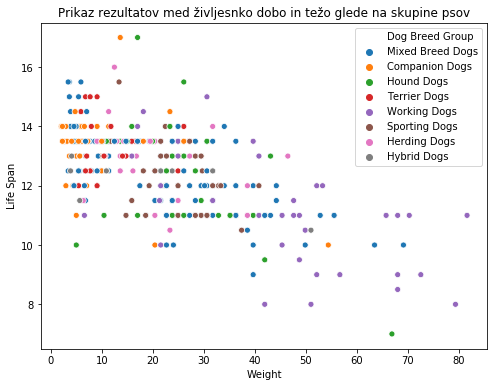

In [5]:
rcp['figure.figsize'] = 8, 6 

plt.title('Prikaz rezultatov med življesnko dobo in težo glede na skupine psov')
sns.scatterplot(x='Weight', y='Life Span', data=dfDogBreed,
                hue='Dog Breed Group')

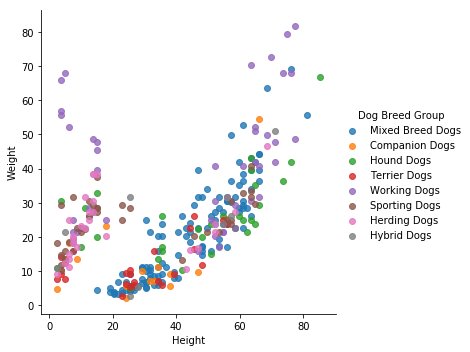

In [91]:
sns.lmplot(x='Height', y='Weight', hue='Dog Breed Group', data=dfDogBreed, fit_reg=False) 

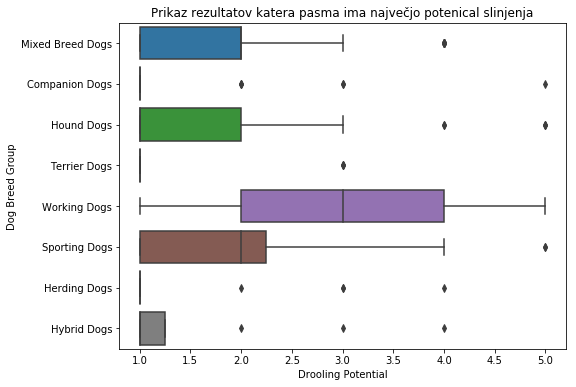

In [92]:
plt.title('Prikaz rezultatov katera pasma ima največjo potenical slinjenja')
sns.boxplot(data=dfDogBreed, x='Drooling Potential', y='Dog Breed Group', orient='h') 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

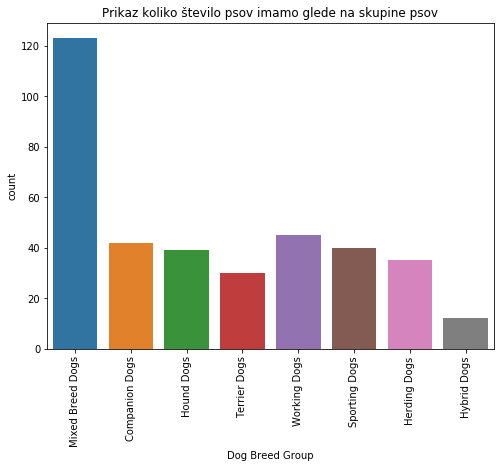

In [93]:
plt.title('Prikaz koliko število psov imamo glede na skupine psov')
sns.countplot(x='Dog Breed Group', data=dfDogBreed) # Prešteje število vnosov po tipu
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

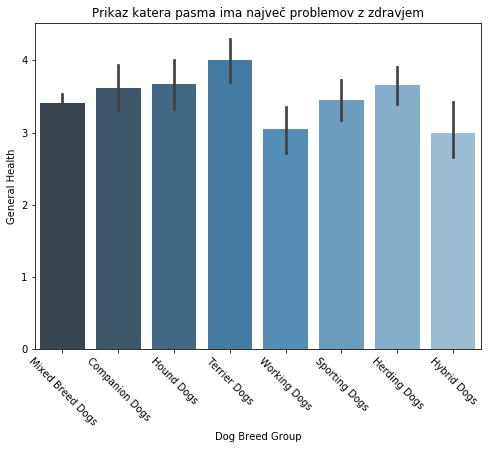

In [94]:
plt.title('Prikaz katera pasma ima največ problemov z zdravjem')
sns.barplot(y='General Health', 
            x='Dog Breed Group', 
            data=dfDogBreed, 
            estimator=np.mean, # Prikaže povprečja
            palette='Blues_d')  # Spremenimo barve

plt.xticks(rotation=-45) # Obrnemo napise

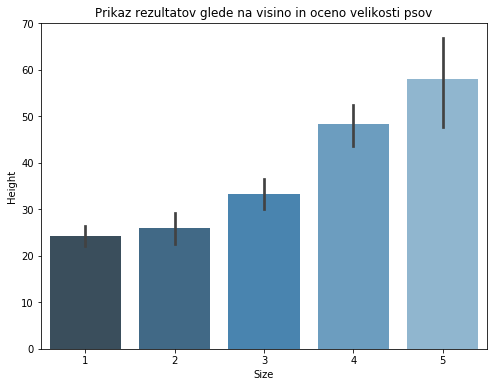

In [95]:
plt.title('Prikaz rezultatov glede na visino in oceno velikosti psov')
sns.barplot(y='Height', 
            x='Size', 
            data=dfDogBreed, 
            estimator=np.mean, # Prikaže povprečja
            palette='Blues_d')  # Spremenimo barve

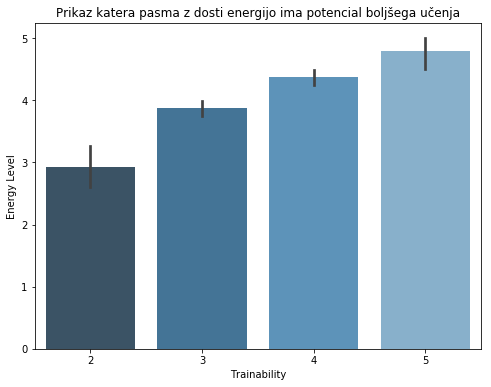

In [96]:
plt.title('Prikaz katera pasma z dosti energijo ima potencial boljšega učenja')
sns.barplot(y='Energy Level', 
            x='Trainability', 
            data=dfDogBreed, 
            estimator=np.mean, # Prikaže povprečja
            palette='Blues_d')  # Spremenimo barve

# Izvedba Klasifikacije
V prejšnih točkah smo videli, da nekaterim stolpcom manjkajo podatki zato smo uporabili knjižnice, kjer smo dodali podatkom povprečje vseh katerim primanjkujejo podatki in nato še normalizirali številske stolpce

### Priprava podatkov

In [97]:
#Pretvorba in urejnaje podatkov
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

izhodna_vrednost = 'Dog Breed Group'
stevilske_vrednosti = list(dfDogBreed)
stevilske_vrednosti.remove('Url_image')
stevilske_vrednosti.remove('About')
stevilske_vrednosti.remove('Dog Breed Group')

#nafilat manjkajoče podatke
manjkajoce_stevilske = ['Height', 'Weight', 'Life Span','Tendency To Bark Or Howl','Prey Drive','Drooling Potential']
povprecje = SimpleImputer(missing_values= np.nan, strategy='mean')

dfDogBreed[manjkajoce_stevilske] = povprecje.fit_transform(dfDogBreed[manjkajoce_stevilske])

dfDogBreed.isnull().sum()

dfDogBreed[stevilske_vrednosti] = StandardScaler().fit_transform(dfDogBreed[stevilske_vrednosti])

### Preverjanje kateri klasifikator da najboljšo natančnost
Uporabili smo različne algoritme s katerimi smo preverjali kateri algoritem vrne najboljšo natančnost podatkov.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics

#8. Uporabite spodnje klasifikacijske metode:
klasifikatorji = [] 
klasifikatorji.append(LogisticRegression())
klasifikatorji.append(RidgeClassifier())
klasifikatorji.append(LinearSVC())
klasifikatorji.append(KNeighborsClassifier())
klasifikatorji.append(BernoulliNB())
klasifikatorji.append(GaussianNB())     
klasifikatorji.append(DecisionTreeClassifier())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(GradientBoostingClassifier())
klasifikatorji.append(GaussianProcessClassifier())
klasifikatorji.append(LabelSpreading())
warn.filterwarnings("ignore", category=Warning)

cv_rezultati = {}

#9. Pri klasifikaciji uporabite stratificirano navzkrižno validacijo s petimi rezi, random state=789 in z optimizacijo metrike točnosti.
kfold = StratifiedKFold(n_splits=5, random_state=123)


for klasifikator in klasifikatorji:
    cv_rez = cross_val_score(klasifikator, dfDogBreed[stevilske_vrednosti], dfDogBreed[izhodna_vrednost], cv=kfold, scoring='accuracy') 
    print(type(klasifikator).__name__,": ", cv_rez.mean())  #10. Za vsak rezultat rezultate izpišite v konzolo.
    cv_rezultati[type(klasifikator).__name__] = cv_rez.mean()

LogisticRegression :  0.4393140180504641
RidgeClassifier :  0.4643265376122795
LinearSVC :  0.4421309194589148
KNeighborsClassifier :  0.4066441357429202
BernoulliNB :  0.38245692113104807
GaussianNB :  0.4482102386005531
DecisionTreeClassifier :  0.4563995969730101
RandomForestClassifier :  0.5303997684738568
ExtraTreesClassifier :  0.4928154650888589
GradientBoostingClassifier :  0.5326704182476901
GaussianProcessClassifier :  0.39309895598859523
LabelSpreading :  0.3490916243273951


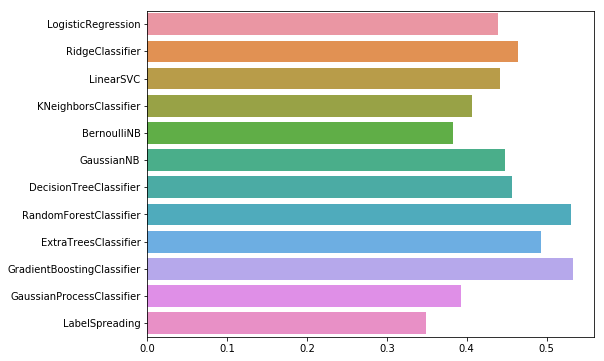

In [99]:
sns.barplot(x=list(cv_rezultati.values()),  
            y=list(cv_rezultati))

### Izvedba porazdelitve podatkov in klasificiranje podatkov

Podatke smo porazdelili na 30 testne množice in 70 učne množice, nato smo klasificirali z algoritmom gradientBoostingClasifier(), prvič s privzetimi nastavitvami in nato še z tehniko GridSearchCV(), s katero smo iskali ustrezne parametre. Iz rezultatov je razvidno, da se je z tehniko Gridsearch rezultat poslabšal v klasifikaciji.

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfDogBreed[stevilske_vrednosti], dfDogBreed[izhodna_vrednost], test_size=0.30, random_state=420)

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)
rfc_pred = gbm.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy:',accuracy_score(y_test, rfc_pred))
print()
#print('micro f matrix:', f1_score(y_test, rfc_pred, average='micro'))
print(classification_report(y_test, rfc_pred))

Accuracy: 0.6272727272727273

                  precision    recall  f1-score   support

  Companion Dogs       0.78      0.47      0.58        15
    Herding Dogs       0.57      0.57      0.57         7
      Hound Dogs       0.46      0.67      0.55         9
     Hybrid Dogs       0.00      0.00      0.00         3
Mixed Breed Dogs       0.71      0.87      0.78        45
   Sporting Dogs       0.75      0.43      0.55        14
    Terrier Dogs       0.43      0.50      0.46         6
    Working Dogs       0.40      0.36      0.38        11

       micro avg       0.63      0.63      0.63       110
       macro avg       0.51      0.48      0.48       110
    weighted avg       0.63      0.63      0.61       110



In [82]:
df_confusion = pd.crosstab(y_test, rfc_pred)
df_confusion

col_0,Companion Dogs,Herding Dogs,Hound Dogs,Hybrid Dogs,Mixed Breed Dogs,Sporting Dogs,Terrier Dogs,Working Dogs
Dog Breed Group,,,,,,,,
Companion Dogs,7,0,0,0,6,1,0,1
Herding Dogs,0,4,0,0,1,0,1,1
Hound Dogs,0,0,6,0,3,0,0,0
Hybrid Dogs,1,0,1,0,0,1,0,0
Mixed Breed Dogs,0,0,0,1,39,0,2,3
Sporting Dogs,0,1,2,0,3,6,1,1
Terrier Dogs,1,0,0,0,2,0,3,0
Working Dogs,0,2,4,0,1,0,0,4


In [83]:
parametri = {'n_estimators': [100,300,500],
             'criterion': ['friedman_mse', 'mse', 'mae'],
             'max_features': ['auto', 'sqrt', 'log2']
            }

clf = GridSearchCV(GradientBoostingClassifier(),
                   parametri,
                   cv=5, 
                   scoring='accuracy')

clf.fit(x_train, y_train)

print('Najboljše vrednosti parametrov so:', clf.best_params_)
print('Najboljši rezultat je:', clf.best_score_)

Najboljše vrednosti parametrov so: {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'n_estimators': 500}
Najboljši rezultat je: 0.59765625


In [84]:
clf_pred = clf.predict(x_test)

print('Accuracy:',accuracy_score(y_test, clf_pred))
print()
print(classification_report(y_test, clf_pred))

Accuracy: 0.5909090909090909

                  precision    recall  f1-score   support

  Companion Dogs       0.64      0.47      0.54        15
    Herding Dogs       0.43      0.86      0.57         7
      Hound Dogs       0.55      0.67      0.60         9
     Hybrid Dogs       0.00      0.00      0.00         3
Mixed Breed Dogs       0.73      0.82      0.77        45
   Sporting Dogs       0.50      0.29      0.36        14
    Terrier Dogs       0.50      0.33      0.40         6
    Working Dogs       0.30      0.27      0.29        11

       micro avg       0.59      0.59      0.59       110
       macro avg       0.45      0.46      0.44       110
    weighted avg       0.58      0.59      0.57       110



In [85]:
df_confusion = pd.crosstab(y_test, clf_pred)
df_confusion

col_0,Companion Dogs,Herding Dogs,Hound Dogs,Hybrid Dogs,Mixed Breed Dogs,Sporting Dogs,Terrier Dogs,Working Dogs
Dog Breed Group,,,,,,,,
Companion Dogs,7,1,0,0,5,1,1,0
Herding Dogs,0,6,0,0,1,0,0,0
Hound Dogs,0,0,6,0,2,1,0,0
Hybrid Dogs,1,0,1,0,0,1,0,0
Mixed Breed Dogs,1,2,0,1,37,1,1,2
Sporting Dogs,0,3,1,0,1,4,0,5
Terrier Dogs,2,0,0,0,2,0,2,0
Working Dogs,0,2,3,0,3,0,0,3


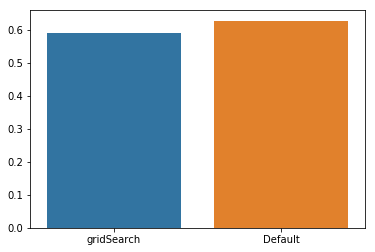

In [86]:
seznam = [accuracy_score(y_test, clf_pred),accuracy_score(y_test, rfc_pred)]

sns.barplot(x=['gridSearch', 'Default'],  
            y=list(seznam))

# Izvedba gručenja
Zanimalo nas je kako gručenje porazedli našo množico psov glede na podobnost podatkov, v kateri imamo v osnovi 8 skupin, optimalna meja gručenja z algoritmom kMeans je razdelila pasme na 3 skupine

Text(0.5, 0, 'Število gruč')

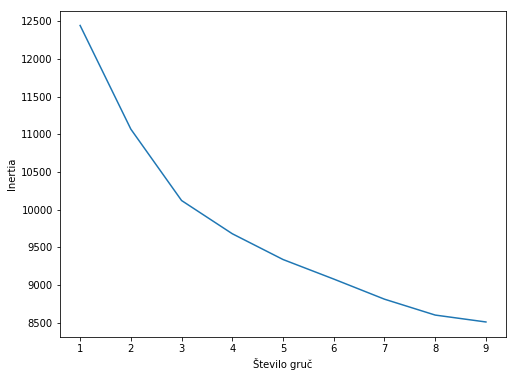

In [100]:
from sklearn.cluster import KMeans

# uporaba Gručenja glede na podobnosti psov
inertia = {}
labels_kMeans = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dfDogBreed[stevilske_vrednosti])
    labels_kMeans[k] = kmeans.labels_
    inertia[k] = kmeans.inertia_

sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.ylabel("Inertia")
plt.xlabel("Število gruč")

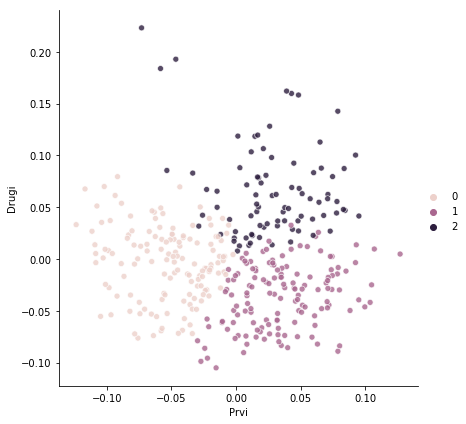

In [101]:
from sklearn.decomposition import FastICA

df_breeds_transformirani = FastICA(n_components=2).fit_transform(dfDogBreed[stevilske_vrednosti])
df_st_transform = pd.DataFrame(df_breeds_transformirani, columns=('Prvi','Drugi'))

k_means_best = labels_kMeans.get(3)

sns.relplot(x="Prvi", y="Drugi", hue=k_means_best, alpha=.8, height=6, data=df_st_transform)


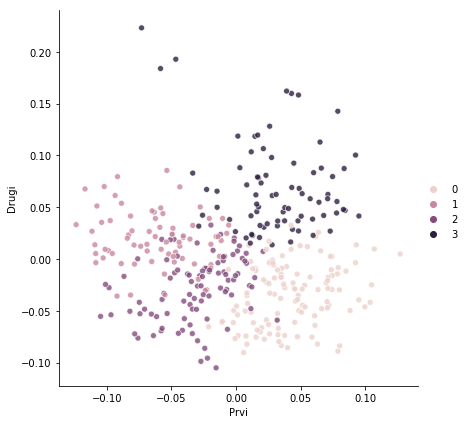

In [102]:
k_means_best = labels_kMeans.get(4)
sns.relplot(x="Prvi", y="Drugi", hue=k_means_best, alpha=.8, height=6, data=df_st_transform)

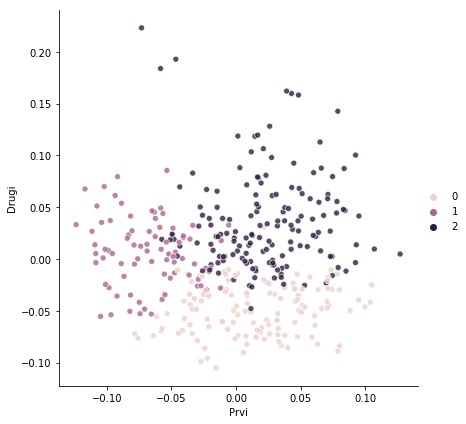

In [103]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(dfDogBreed[stevilske_vrednosti])

sns.relplot(x="Prvi", y="Drugi", hue=labels, alpha=.8, height=6, data=df_st_transform)

# Obdelava in pregled besedila glede na skupine psov
Najprej smo iz obdelanega besedila odstranili nepotrebne besede, tokenizirali in "stem-ali". Za tem prikazujemo oblak besed v katerem pokažemo najbolj pogoste besede v vseh združenih "About me" besedil.
Združimo vse tekste glede na skupine v katere spadajo psi in prikažemo 10 najbolj pogostih besed glede na skupine v grafih glede na unigrame in bigrame.


In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /home/nbuser/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /home/nbuser/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /home/nbuser/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /home/nbuser/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /home/nbuser/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /home/nbuser/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dep

True

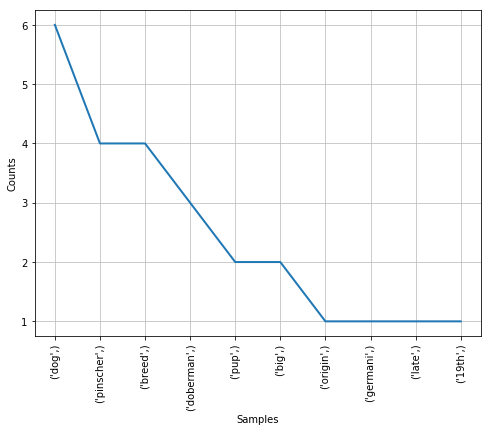

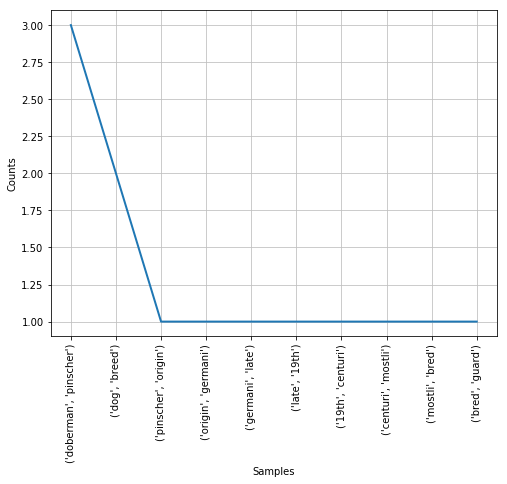

In [13]:
#!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk import ngrams
from nltk import FreqDist

stemmer = PorterStemmer()
stop_words = stopwords.words("english")
stop_words.append("'s")
stop_words.append("’")
stop_words.append('"')
stop_words.append('”')
stop_words.append('“')
stop_words.append('—')
stop_list = stop_words + list(string.punctuation)

def spremeni_besedilo(besedilo):
    tokeni = word_tokenize(besedilo)
    tokeni = [beseda.lower() for beseda in tokeni]
    changed_words = [stemmer.stem(t) for t in tokeni if t not in stop_list]
    return changed_words

doberman = spremeni_besedilo(dfDogBreed.loc['Doberman Pinscher','About'])

enojcki = FreqDist(ngrams(doberman, 1))
enojcki.plot(10, cumulative=False)

dvojcki = FreqDist(ngrams(doberman, 2))
dvojcki.plot(10, cumulative=False)

(-0.5, 799.5, 1059.5, -0.5)

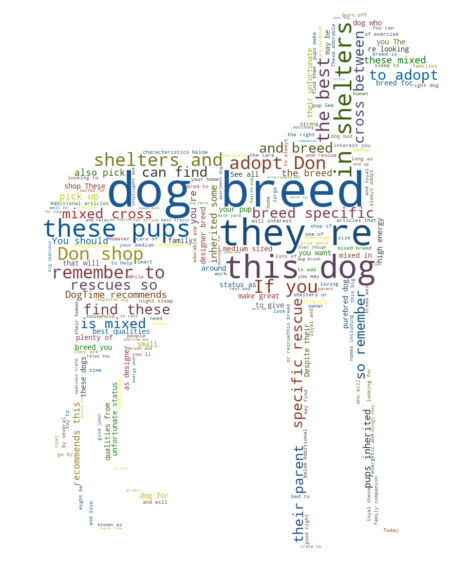

In [14]:
import matplotlib
from wordcloud import WordCloud , STOPWORDS
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

matplotlib.rcParams['figure.figsize'] = (16, 10)

stopwords = set(STOPWORDS)
cmap = LinearSegmentedColormap.from_list("mycmap", ["#008000", "#A52A2A", "#0060A8", "#303030", "#FFF200"])

dog_mask = np.array(Image.open("dog-silhouette-Chart-afrykanski-azaw.jpg"))
vsa_besedila = ' '.join([dogs for dogs in dfDogBreed['About']])
vsa_besedila = vsa_besedila.replace('breed dog', '')

wc = WordCloud(background_color="white", stopwords=stopwords,width=800, height=1060, mask=dog_mask, colormap=cmap)
wc.generate(vsa_besedila)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [15]:
matplotlib.rcParams['figure.figsize'] = (8, 6)

mixed_breed_dogs, companion_dogs, hound_dogs, terrier_dogs, working_dogs, sporting_dogs, herding_dogs, hybrid_dogs = ("","","","","","","","")

for index, value in enumerate(dfDogBreed['Dog Breed Group']):
    if 'Mixed Breed Dogs' in value:
        mixed_breed_dogs += dfDogBreed.iloc[index].at['About'] + " " 
    elif 'Companion Dogs' in value:
        companion_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Hound Dogs' in value:
        hound_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Terrier Dogs' in value:
        terrier_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Working Dogs' in value:
        working_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Sporting Dogs' in value:
        sporting_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Herding Dogs' in value:
        herding_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "
    elif 'Hybrid Dogs' in value:
        hybrid_dogs += " " + dfDogBreed.iloc[index].at['About'] + " "

### Najpopularnejše besede v besedilih glede na skupine pasem
preverjali smo katere besede so najbolj pogoste glede na skupine pasem v katere spadajo in kako pogosto se pojavlajo. Prikazali smo grafe glede na unigrame in bigrame

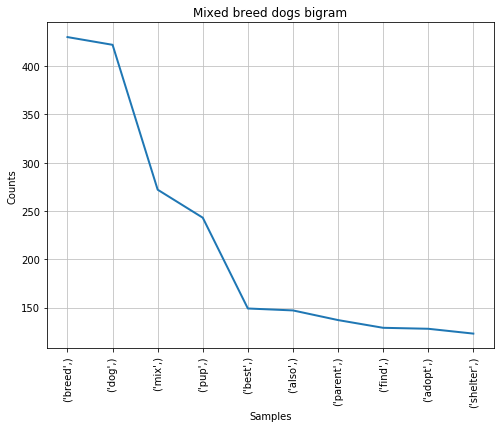

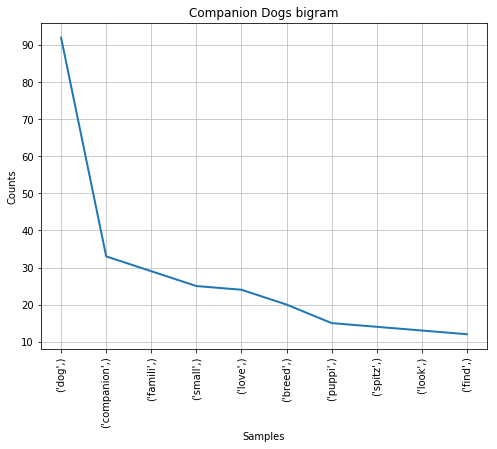

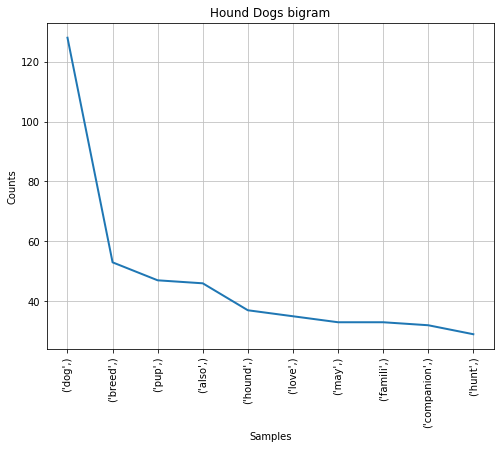

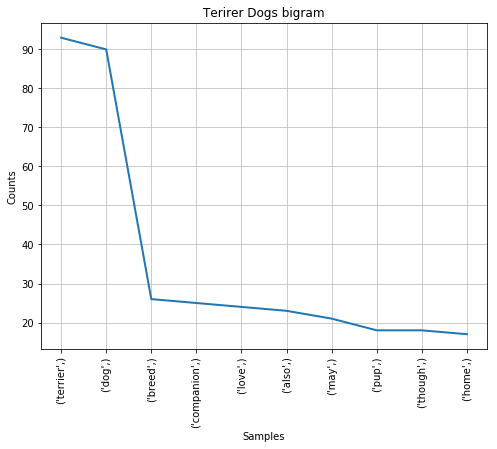

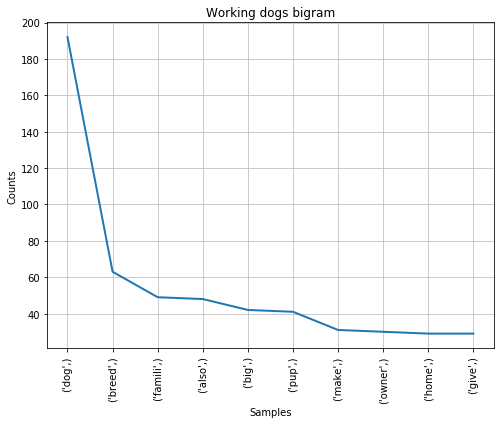

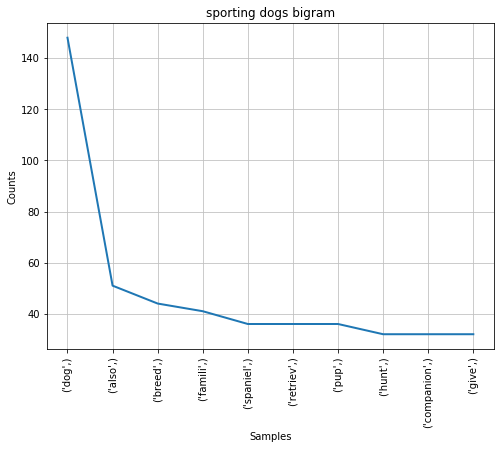

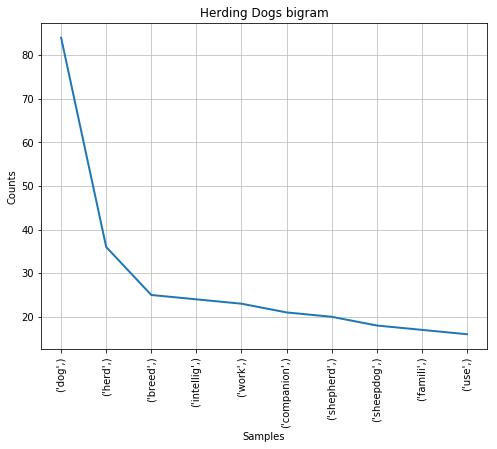

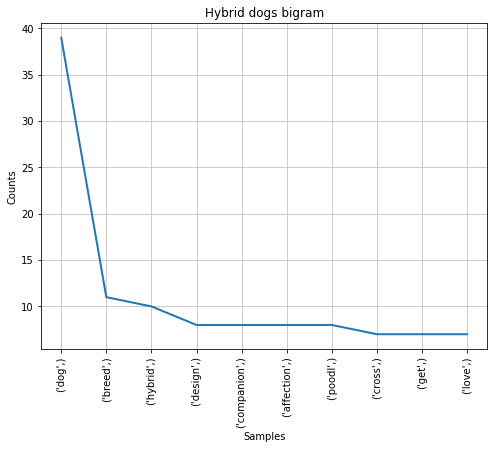

In [16]:
mixed_breed_dogs = mixed_breed_dogs.replace('dog breed', '')
mixed_breed_dogs_changed = spremeni_besedilo(mixed_breed_dogs)
companion_dogs = companion_dogs.replace('dog breed', '')
companion_dogs_changed = spremeni_besedilo(companion_dogs)
hound_dogs = hound_dogs.replace('dog breed', '')
hound_dogs_changed = spremeni_besedilo(hound_dogs)
terrier_dogs = terrier_dogs.replace('dog breed', '')
terrier_dogs_changed = spremeni_besedilo(terrier_dogs)
working_dogs = working_dogs.replace('dog breed', '')
working_dogs_changed = spremeni_besedilo(working_dogs)
sporting_dogs = sporting_dogs.replace('dog breed', '')
sporting_dogs_changed = spremeni_besedilo(sporting_dogs)
herding_dogs = herding_dogs.replace('dog breed', '')
herding_dogs_changed = spremeni_besedilo(herding_dogs)
hybrid_dogs = hybrid_dogs.replace('dog breed', '')
hybrid_dogs_changed = spremeni_besedilo(hybrid_dogs)

enojcki = FreqDist(ngrams(mixed_breed_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Mixed breed dogs bigram')

enojcki = FreqDist(ngrams(companion_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Companion Dogs bigram')

enojcki = FreqDist(ngrams(hound_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Hound Dogs bigram')

enojcki = FreqDist(ngrams(terrier_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Terirer Dogs bigram')

enojcki = FreqDist(ngrams(working_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Working dogs bigram')

enojcki = FreqDist(ngrams(sporting_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='sporting dogs bigram')

enojcki = FreqDist(ngrams(herding_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Herding Dogs bigram')

enojcki = FreqDist(ngrams(hybrid_dogs_changed, 1))
enojcki.plot(10, cumulative=False, title='Hybrid dogs bigram')

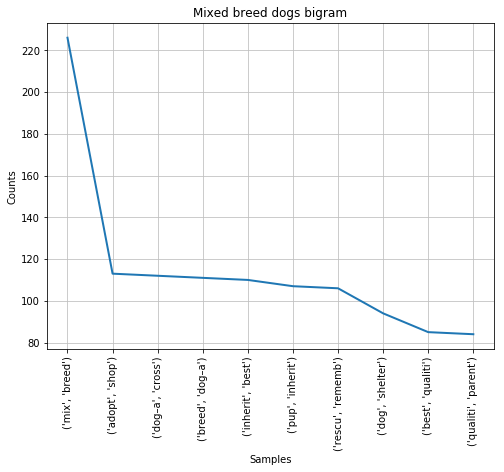

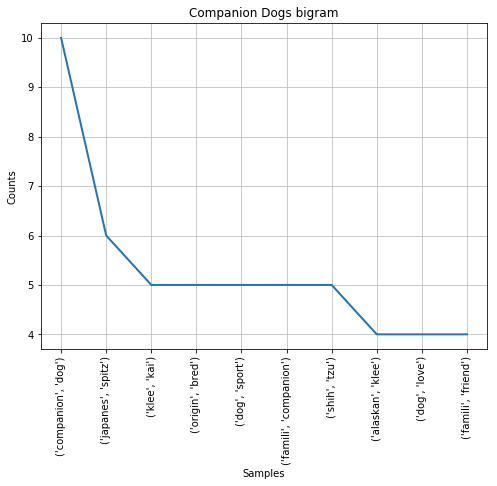

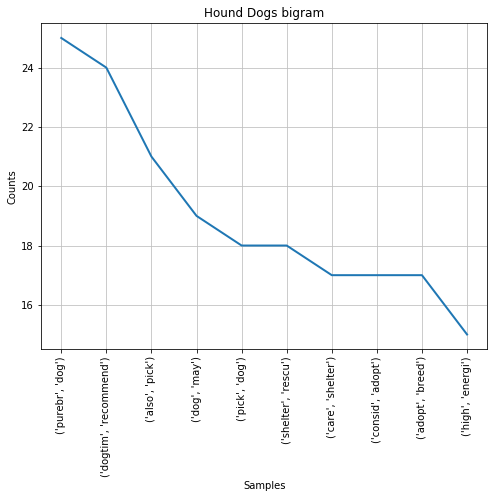

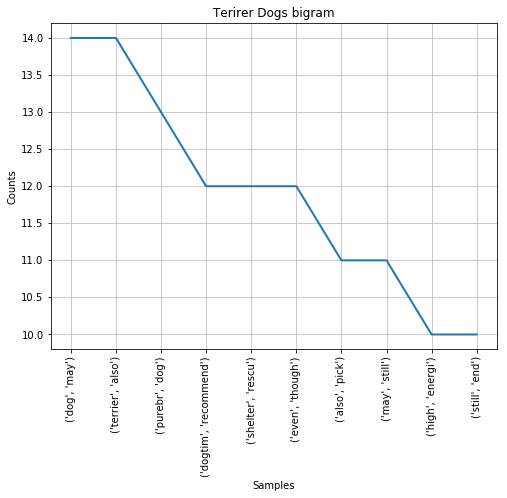

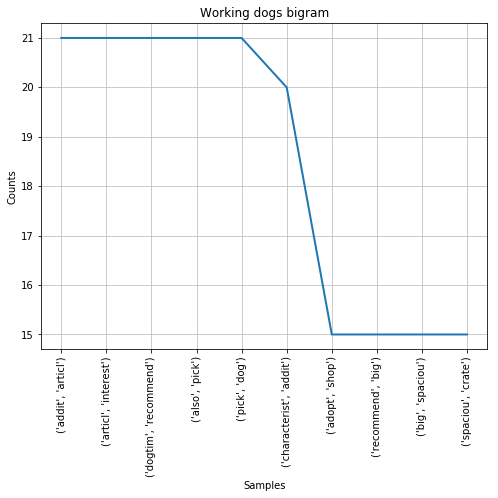

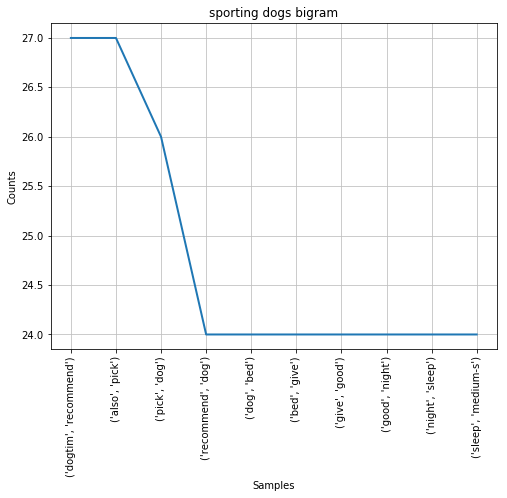

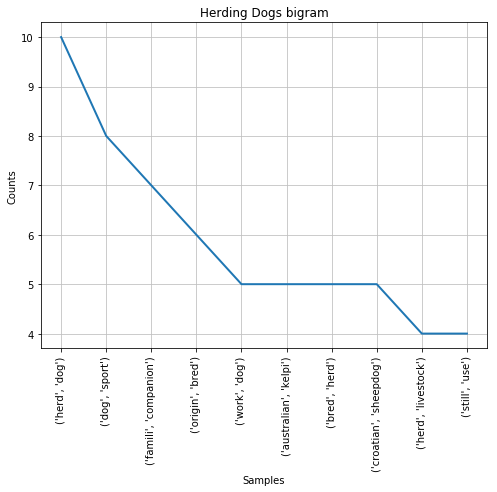

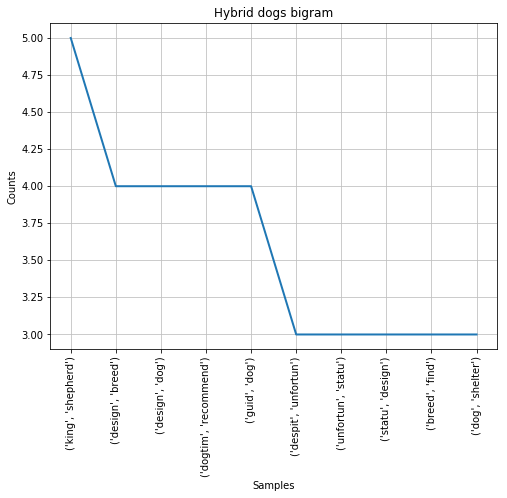

In [17]:
dvojcki = FreqDist(ngrams(mixed_breed_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Mixed breed dogs bigram')

dvojcki = FreqDist(ngrams(companion_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Companion Dogs bigram')

dvojcki = FreqDist(ngrams(hound_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Hound Dogs bigram')

dvojcki = FreqDist(ngrams(terrier_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Terirer Dogs bigram')

dvojcki = FreqDist(ngrams(working_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Working dogs bigram')

dvojcki = FreqDist(ngrams(sporting_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='sporting dogs bigram')

dvojcki = FreqDist(ngrams(herding_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Herding Dogs bigram')

dvojcki = FreqDist(ngrams(hybrid_dogs_changed, 2))
dvojcki.plot(10, cumulative=False, title='Hybrid dogs bigram')

## Klasifikacija teksta
Testiramo klasificiranje glede na unigrame bigrame trigrame in stirigrame z algoritmom multinomialNB(). Zanima nas katera uporaba "gramov" najboljše klasificira v katero skupino psov spada pasma. Odkrili smo da najboljše se klasificira glede na unigrame.

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

seznam_klas_besedilo = []

def change_text(besedilo):
    tokeni = word_tokenize(besedilo)
    tokeni_brez_stop = [stemmer.stem(token) for token in tokeni if token not in stop_list]
    return ' '.join(tokeni_brez_stop)

vectorizer = TfidfVectorizer(ngram_range=(1,1), preprocessor=change_text, lowercase=True) 
vhodni_podatek = vectorizer.fit_transform(dfDogBreed['About'])

x_train, x_test, y_train, y_test = train_test_split(vhodni_podatek, dfDogBreed['Dog Breed Group'], test_size=0.40, random_state=555)
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

seznam_klas_besedilo.append(accuracy_score(y_test, clf_pred))

In [112]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), preprocessor=change_text, lowercase=True) 
vhodni_podatek = vectorizer.fit_transform(dfDogBreed['About'])

x_train, x_test, y_train, y_test = train_test_split(vhodni_podatek, dfDogBreed['Dog Breed Group'], test_size=0.40, random_state=555)
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

seznam_klas_besedilo.append(accuracy_score(y_test, clf_pred))

In [113]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), preprocessor=change_text, lowercase=True) 
vhodni_podatek = vectorizer.fit_transform(dfDogBreed['About'])

x_train, x_test, y_train, y_test = train_test_split(vhodni_podatek, dfDogBreed['Dog Breed Group'], test_size=0.40, random_state=555)
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

seznam_klas_besedilo.append(accuracy_score(y_test, clf_pred))

In [114]:
vectorizer = TfidfVectorizer(ngram_range=(1,4), preprocessor=change_text, lowercase=True) 
vhodni_podatek = vectorizer.fit_transform(dfDogBreed['About'])

x_train, x_test, y_train, y_test = train_test_split(vhodni_podatek, dfDogBreed['Dog Breed Group'], test_size=0.40, random_state=555)
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

seznam_klas_besedilo.append(accuracy_score(y_test, clf_pred))

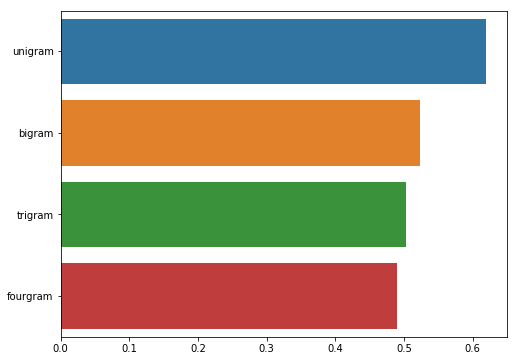

In [115]:
seznam_gramov = ['unigram', 'bigram', 'trigram', 'fourgram']
sns.barplot(x= seznam_klas_besedilo, y= seznam_gramov)

## Uporaba Keras knjižnice za klasifikacijo slik že na naučeni množici
Zanimalo nas je kako dobro že naučena množica ugotavlja pasme psov. Omejili smo se na to da če že odkrije v katero skupino spada pasma torej ali je ovčar ali prenašalec da ga ovrsti v uspesno klasificiranje drugače pa v neuspešno (To smo omejili zato ker smo se zaveali da naučena množica ne vsebuje vsebuje vseh pasem kot so kakšne nove ali mešane pasme).

In [116]:
from keras.preprocessing import image
from keras.applications import inception_v3
from keras import backend as K

model = inception_v3.InceptionV3()

Using TensorFlow backend.


96116736/96112376 [==============================] - 15s 0us/step


In [117]:
def predictImage(imageFile, model):
    # Load the image file and convert it to a numpy array
    baseheight = 299
    basewidth = 299
    response = requests.get(imageFile)
    img = Image.open(BytesIO(response.content))
    size = (baseheight, basewidth)
    fit_and_resized_image = ImageOps.fit(img, size, Image.ANTIALIAS)

    input_image = image.img_to_array(fit_and_resized_image)
    
    # Scale the image so all pixel intensities are between [-1, 1] as the model expects
    input_image /= 255.
    input_image -= 0.5
    input_image *= 2.
    
    # Add a 4th dimension for batch size (as Keras expects)
    input_image = np.expand_dims(input_image, axis=0)
    
    # Run the image through the neural network
    predictions = model.predict(input_image)
    
    # Convert the predictions into text and print them
    predicted_classes = inception_v3.decode_predictions(predictions, top=1)
    imagenet_id, name, confidence = predicted_classes[0][0]
    #print("This is a {} with {:.4}% confidence!".format(name, confidence * 100))
    return name, confidence

40960/35363 [==================================] - 0s 0us/step
This is a malamute with 0.59 accuracy!
curect answer:  Alaskan Malamute


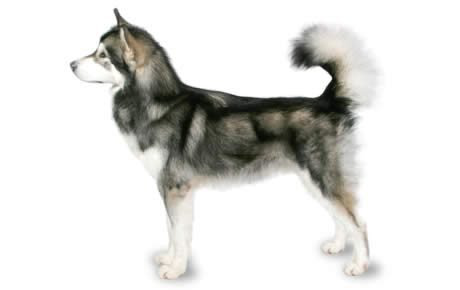

In [118]:
from PIL import Image, ImageOps
import requests
from io import BytesIO

sport_dogs = dfDogBreed[dfDogBreed['Dog Breed Group'] == 'Working Dogs']
url_images= sport_dogs['Url_image']
url_images[2]
response = requests.get(url_images[2])
img = Image.open(BytesIO(response.content))

# Predict the image
name, confidence = predictImage(url_images[2], model)
print("This is a", name, "with", round(confidence,2), "accuracy!")
print("curect answer: ",sport_dogs.index.values.tolist()[2])
img



In [119]:
temp_dfdogbreed = dfDogBreed
urls = dfDogBreed['Url_image']
imena_psov = dfDogBreed.index.values.tolist()
besedila_psov = dfDogBreed['About'].tolist()
predictions = []
accuracy = []
predictions_names = []

for i, url in enumerate(urls):
    name, confidence = predictImage(url, model)
    splitted = name.split('_')
    preveri = False
    for sp in splitted:
        if sp.lower() in imena_psov[i].lower() or sp.lower() in besedila_psov[i].lower():
            preveri = True
            break
    if preveri is True:
        predictions.append(True)
        accuracy.append(round(confidence,2))
        predictions_names.append(name)
    else:
        predictions.append(False)
        accuracy.append(round(confidence,2))
        predictions_names.append(name)
        
temp_dfdogbreed['predictions'] = predictions
temp_dfdogbreed['accuracy'] = accuracy
temp_dfdogbreed['pred_names'] = predictions_names

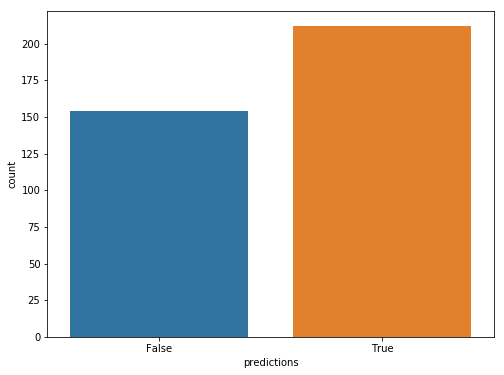

In [120]:
sns.countplot(x="predictions", 
            data=temp_dfdogbreed)

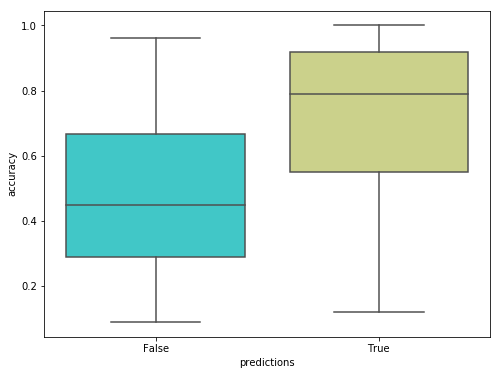

In [121]:
sns.boxplot(x='predictions',y='accuracy',data=temp_dfdogbreed,palette='rainbow')

In [122]:
df_tp =temp_dfdogbreed[temp_dfdogbreed['predictions'] == True]
print('skupno stevilo vseh',dfDogBreed.shape[0])
print('st pravilno klasificiranih',df_tp.shape[0])
print('st nepravilno klasificiranih', dfDogBreed.shape[0]- df_tp.shape[0])

skupno stevilo vseh 366
st pravilno klasificiranih 212
st nepravilno klasificiranih 154
